### Time Series Data Analysis
#### Monthly Arctic Oscillation data
#### http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
#### monthly.ao.index.b50.current 

In [1]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the data from the input file
filename = "monthly.ao.index.b50.current.ascii"
input_data = np.loadtxt(filename, delimiter = None)

# Kalman filter - Tracking

In [3]:
# intial parameters
# DATA
z = input_data[:,2] # observations in 3rd column
n_iter = len(input_data)
sz = (n_iter,) # size of array - "," to make it tuple
# ADD NOISE - KALMAN FILTER WILL TRACK SIGNAL
zm = np.mean(z)
zn = z + np.random.normal(zm,0.1,size=sz) # observations (normal about x, sigma=0.1)

### Assume Q & R CONSTANT and preestimated in advance

In [4]:
# process variance (Not under our control but assume reliable)
Q = 1e-3 

In [5]:
# estimate of measurement variance, change to see effect
R = 1e-1 #  Can be measured prior 0.00001

In [6]:
# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

In [7]:
# intial guesses
xhat[0] = -2.0 # Intentionaly start BAD
P[0] = 1.0

In [8]:
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(zn[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

Text(0, 0.5, 'Measurement')

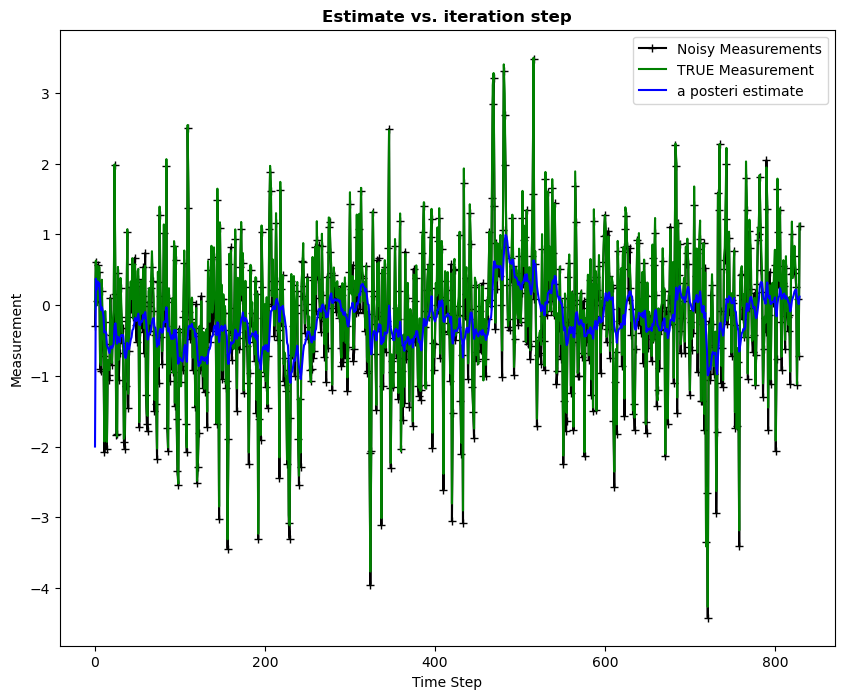

In [9]:
plt.rcParams['figure.figsize'] = (10, 8)

plt.figure()
plt.plot(zn,'k+-',label='Noisy Measurements')
plt.plot(z,'g-',label='TRUE Measurement')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Time Step')
plt.ylabel('Measurement')

Text(0, 0.5, 'Measurement')

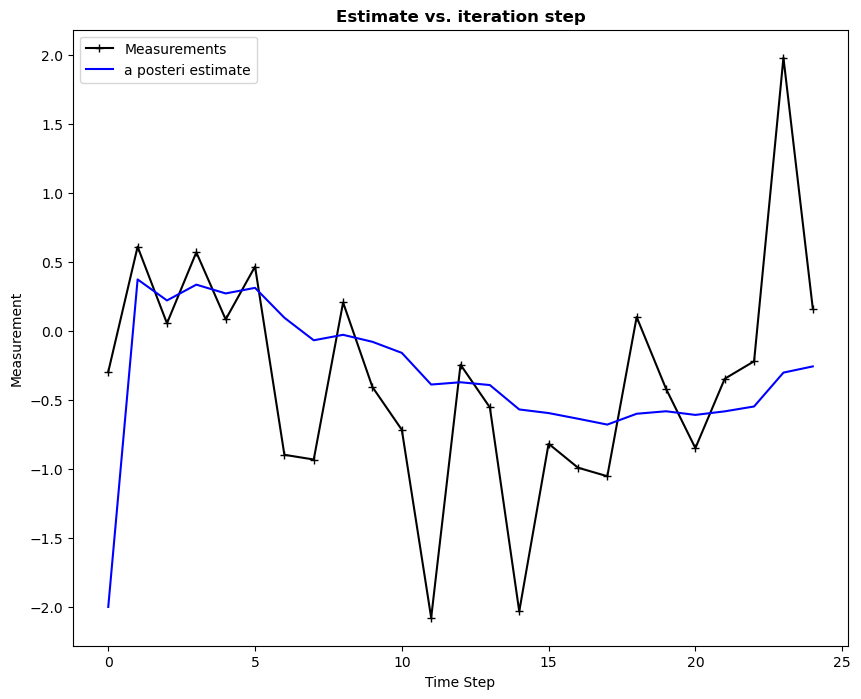

In [10]:
StartIndx = 0
EndIndx = 25

plt.figure()
plt.plot(zn[StartIndx:EndIndx],'k+-',label='Measurements')
#plt.plot(z[StartIndx:EndIndx],'g-',label='TRUE Measurement')
plt.plot(xhat[StartIndx:EndIndx],'b-',label='a posteri estimate')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Time Step')
plt.ylabel('Measurement')

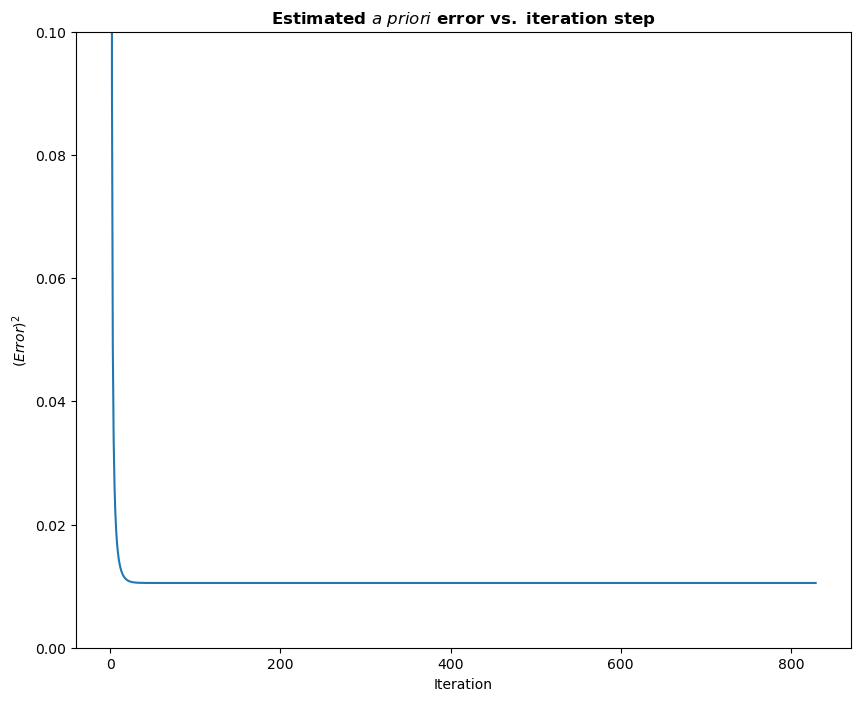

In [11]:
plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
# For fun with Italics and bold title
plt.title('$\mathbf{Estimated \mathit{\ a \ priori} \ error \ vs. \ iteration \ step}$')
plt.xlabel('Iteration')
plt.ylabel('$(Error)^2$')
plt.setp(plt.gca(),'ylim',[0,.1])
plt.show()